## Introduction

Welcome to my assignment centered around the **PWC Digital Intelligence Virtual Experience for Forge**.
Within this segment, I will immerse myself in the analysis of classification,
utilizing data from the **Bank Marketing dataset** sourced from Kaggle.
Notably, this dataset presents a challenge with class imbalance.
To address this, I will harness the power of the **SMOTE + ENN algorithm**,
which intelligently combines oversampling and undersampling techniques, effectively rectifying the class distribution in the training data.
Following this, I will apply the **Random Forest algorithm**, fine-tuned through **random search optimization**,
to achieve optimal predictive performance.

## Random Forest and Random Search Optimization

The **Random Forest algorithm** is a powerful ensemble learning method
that combines multiple decision trees to yield more accurate and robust predictions.
Each decision tree in the ensemble operates on a bootstrapped subset of the data and makes individual predictions.
The Random Forest algorithm aggregates these predictions, mitigating overfitting and enhancing generalization capabilities.

In conjunction with Random Forest, the process of **random search optimization** comes into play.
Random search is a hyperparameter tuning technique that explores a predefined range of hyperparameters for a given algorithm.
Unlike exhaustive grid search, which evaluates all possible combinations,
random search selects random combinations of hyperparameters to evaluate.
This approach significantly improves efficiency, enabling the algorithm to converge toward optimal hyperparameters more quickly.

By implementing random search optimization,
we can systematically discover the most suitable hyperparameters for our Random Forest model,
maximizing its predictive power while avoiding the computational burden associated with exhaustive search methods.
This synergistic approach enhances the model's ability to extract meaningful patterns from the data,
ultimately resulting in a more accurate and effective classification solution.


## Data Information

In this section, I will examine the data for empty values, mismatched data types, and structural integrity. The dataset consists of 21 columns and 41,188 rows.

**Attribute Information**:

**Input Variables**:

1. **age** (numeric)
2. **job**: Type of job (categorical: "admin.", "blue-collar", ..., "unemployed", "unknown")
3. **marital**: Marital status (categorical: "divorced", "married", "single", "unknown" – note: "divorced" represents divorced or widowed)
4. **education**: Education level (categorical: "basic.4y", "basic.6y", ..., "university.degree", "unknown")
5. **default**: Has credit in default? (categorical: "no", "yes", "unknown")
6. **housing**: Has housing loan? (categorical: "no", "yes", "unknown")
7. **loan**: Has personal loan? (categorical: "no", "yes", "unknown")

**Related to the Last Contact of the Current Campaign**:

8. **contact**: Contact communication type (categorical: "cellular", "telephone")
9. **month**: Last contact month of the year (categorical: "jan", "feb", ..., "nov", "dec")
10. **day_of_week**: Last contact day of the week (categorical: "mon", "tue", ..., "fri")
11. **duration**: Last contact duration in seconds (numeric) – Note: This attribute significantly affects the output target (e.g., if duration=0 then y="no"). However, the duration is unknown before a call is made and is only known after the call ends. Therefore, this input is included solely for benchmark purposes and should be discarded if aiming for a realistic predictive model.

**Other Attributes**:

12. **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: Number of days passed since the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted)
14. **previous**: Number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: Outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

**Social and Economic Context Attributes**:

16. **emp.var.rate**: Employment variation rate – quarterly indicator (numeric)
17. **cons.price.idx**: Consumer price index – monthly indicator (numeric)
18. **cons.conf.idx**: Consumer confidence index – monthly indicator (numeric)
19. **euribor3m**: Euribor 3-month rate – daily indicator (numeric)
20. **nr.employed**: Number of employees – quarterly indicator (numeric)

**Output Variable (Desired Target)**:

21. **y**: Has the client subscribed to a term deposit? (binary: "yes", "no")


---



## Load Data and Libraries

In this section, we'll start by setting up the environment and loading the necessary data and libraries for our classification analysis. We'll be using popular Python libraries like **sklearn**, **pandas**, **numpy**, **matplotlib**, and **seaborn** to facilitate various stages of our analysis.

### Library Imports

We begin by importing the essential libraries. Here's a brief overview of the libraries we're using:

- **sklearn**: This library provides a wide range of machine learning algorithms, tools for data preprocessing, and evaluation metrics.
- **pandas**: Pandas is a versatile data manipulation and analysis library that allows us to work with structured data efficiently.
- **numpy**: Numpy is the fundamental package for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices.
- **matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **seaborn**: Seaborn is built on top of matplotlib and offers a high-level interface for creating attractive and informative statistical graphics.

### Loading Data

Next, we'll load our dataset using pandas. In this example, we're assuming that your dataset is stored on Google Drive. We'll mount Google Drive to access the dataset and use pandas to read the data into a DataFrame for further analysis. Make sure to update the `data_path` variable with the correct path to your dataset on Google Drive.


In [45]:
## Load Data and Libraries

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Configure libraries
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

# Load dataset
data_path = 'https://raw.githubusercontent.com/gustiyaniz/PwCAssigmentClassification/main/bank-additional-full.csv'
df = pd.read_csv(data_path,sep=";",header=0)

# print(df info())
print('Shape of dataframe:', df.shape)
df.head()


Shape of dataframe: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
#check columns y
valueofy = df['y'].value_counts()
print('Count Value of Columns y:',valueofy,'\n')

#check empty value
empty = df.isnull().sum()
print('Sum Empty Value in Columns:\n',empty)

Count Value of Columns y: no     36548
yes     4640
Name: y, dtype: int64 

Sum Empty Value in Columns:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [47]:
#remove columns duration from dataset
# Drop 'duration' column
df = df.drop(columns='duration')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Standardize Data

In this step, we'll focus on standardizing the data within the numerical columns of our dataset. Standardization is a crucial preprocessing technique that involves transforming the numerical features to have a mean of 0 and a standard deviation of 1. This process ensures that all features are on the same scale, which can prevent outliers from unduly influencing the model and lead to improved model accuracy.

### Why Standardize Data?

Standardizing the data is essential for several reasons:

1. **Avoiding Outliers Impact**: Outliers can disproportionately affect certain algorithms by introducing noise and bias. Standardization helps minimize the impact of outliers by placing data on a common scale.

2. **Enabling Convergence**: Some machine learning algorithms, like gradient descent-based optimization, converge faster when the features are standardized. This speeds up the learning process and improves efficiency.

3. **Equal Importance**: Standardization ensures that no feature dominates the others due to differences in scales. All features contribute equally to the model's learning process.

### How to Standardize Data

To standardize the numerical columns in our dataset, we'll use the `StandardScaler` from the `sklearn.preprocessing` module. This scaler will transform our data to have a mean of 0 and a standard deviation of 1.

In [48]:
#code for standarize data
from sklearn.preprocessing import StandardScaler
#names columns
columns = list(df.columns)
columns
# check datatype in each column
print("Column datatypes: ")
print(df.dtypes)
# Copying original dataframe
df_set = df.copy()

Column datatypes: 
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [49]:
#standarization data numeric
scaler = StandardScaler()
num_cols = ['age', 'campaign', 'pdays', 'previous','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_set[num_cols] = scaler.fit_transform(df[num_cols])
df_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


## Encode Categorical Data

In this section, our focus is on encoding categorical data to prepare it for machine learning algorithms. Categorical data, such as non-numeric attributes like job type, marital status, and contact communication type, needs to be transformed into a numerical format for algorithms to process effectively.

To achieve this transformation, we'll utilize the `OneHotEncoder()` from the `sklearn.preprocessing` module. This encoder converts categorical variables into a binary matrix representation. Each category is assigned a separate column with binary values, ensuring that there are no implied numerical relationships between categories. This process is essential for accurately representing categorical information in a way that is compatible with machine learning models.

The `OneHotEncoder()` offers a way to avoid introducing spurious relationships between categories and assists in creating an informative representation of the categorical attributes. This transformation facilitates the use of categorical data as input for machine learning algorithms, contributing to more accurate and meaningful model outcomes.


In [50]:
#Encoding Categorical Data To Format Numeric
from sklearn.preprocessing import OneHotEncoder

# Create the encoder and categorical columns
encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
            'day_of_week','poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_set[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Drop Categorical Data and Concatenate Encoded Data
df_set = df_set.drop(cat_cols, axis=1)
df_set = pd.concat([df_encoded, df_set], axis=1)

# Encode target value
df_set['y'] = df_set['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Print the shape and the first few rows of the DataFrame
print('Shape of dataframe:', df_set.shape)
df_set.head()

Shape of dataframe: (41188, 63)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0


## Sampling Data with SMOTE + ENN Algorithm

In this section, we'll address the challenge of class imbalance in our dataset by employing the **SMOTE + ENN algorithm**. This powerful hybrid technique combines two steps: first, it oversamples the minority class using Synthetic Minority Over-sampling Technique (SMOTE), and then it applies the Edited Nearest Neighbors (ENN) algorithm to undersample both the majority and minority classes. This dual approach helps create a balanced dataset that is conducive to training robust classification models.

The SMOTE + ENN algorithm is particularly useful when dealing with imbalanced datasets, as it seeks to overcome the issues posed by skewed class distributions. By generating synthetic samples and subsequently removing misclassified instances, this algorithm effectively mitigates the challenges presented by class imbalance.

## Splitting Data into Training and Testing

With the balanced dataset obtained through SMOTE + ENN, we can now proceed to split the data into training and testing subsets. The purpose of this step is to train our machine learning model on one portion of the data and evaluate its performance on an independent subset. This helps us assess how well the model generalizes to unseen data.

We'll use the `train_test_split()` function from the `sklearn.model_selection` module to split our dataset. By specifying the proportion of data for training and testing, we ensure that the model is trained on a diverse set of samples and evaluated on a separate set.

By splitting our data into training and testing subsets, we set the stage for training, optimizing, and evaluating our classification model effectively.


In [51]:
#Split Dataset for Training and Testing
# Select Features
feature = df_set.drop('y',axis=1) # Features (input variables)

# Select Target
target = df_set['y'] # Target (output variable)

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

In [52]:
#sampling imbalance class with smoth + enn algorithm
from imblearn.combine import SMOTEENN
import collections
counter = collections.Counter(y_train)
print('Before', counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample (X_train, y_train)
counter = collections.Counter (y_train_smenn)
print('After', counter)

Before Counter({0: 29254, 1: 3696})
After Counter({1: 26816, 0: 19642})


## Classification with Random Forest

In this section, we will employ the **Random Forest** classification method to make predictions based on the preprocessed and balanced dataset. Random Forest is a versatile and powerful ensemble learning algorithm that is well-suited for a wide range of classification tasks.

### Random Forest Overview

Random Forest works by building multiple decision trees during training and aggregating their predictions for improved accuracy and robustness. This ensemble approach offers several advantages:

- **Flexibility**: Random Forest works well for various types and sizes of data. It can handle both numeric and categorical features.
- **Non-linear Relationships**: The algorithm can capture complex, non-linear relationships within the data.
- **Reduced Overfitting**: By averaging predictions from multiple trees, Random Forest reduces overfitting and increases generalization capabilities.
- **Robustness**: Random Forest is generally robust and performs well even with noisy or unbalanced data.
- **Feature Importance**: It provides insights into feature importance, helping us understand which attributes contribute most to the classification process.

### Applying Random Forest

We'll use the preprocessed and split dataset to train and evaluate a Random Forest classifier. This process involves training the classifier on the training subset and then assessing its performance on the testing subset. Metrics such as accuracy, precision, recall, and F1-score can help us gauge the classifier's effectiveness.

Remember that the performance of the Random Forest model may depend on hyperparameters, such as the number of trees and the maximum depth of trees. While Random Forest is robust, some parameter tuning might be beneficial for optimal results


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_smenn, y_train_smenn)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8554260742898762
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      7294
           1       0.41      0.60      0.49       944

    accuracy                           0.86      8238
   macro avg       0.68      0.74      0.70      8238
weighted avg       0.88      0.86      0.87      8238



## Optimization of Parameters with Randomized Search

In this section, we'll focus on optimizing the hyperparameters of the Random Forest classifier using the **Randomized Search** technique. Hyperparameters play a crucial role in the performance of machine learning algorithms, and finding the right combination can significantly enhance model effectiveness.

### Randomized Search Overview

Randomized Search is a hyperparameter optimization technique that offers a more efficient alternative to exhaustive grid search. Instead of evaluating all possible hyperparameter combinations, Randomized Search randomly samples a subset of combinations from the specified search space. This approach can lead to faster parameter tuning without sacrificing the quality of results.

### Applying Randomized Search

To apply Randomized Search, we'll define a search space for the hyperparameters we want to optimize. This search space can include parameters like the number of trees, maximum depth, and others. Randomized Search will then explore various combinations within this space and return the combination that yields the best performance.

By leveraging Randomized Search, we can systematically discover hyperparameters that optimize the Random Forest classifier's performance while saving computational resources compared to exhaustive grid search.

### Model Performance and Generalization

It's important to note that while hyperparameter optimization can enhance performance on the training data, it's essential to evaluate the model's performance on unseen data as well. Therefore, we'll still evaluate the final model on our testing subset to ensure its generalization capabilities.

Through the integration of Randomized Search, we aim to fine-tune our Random Forest model, optimizing its hyperparameters to achieve the best possible performance and accuracy on unseen data.


Best Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy: 0.8596746783199806


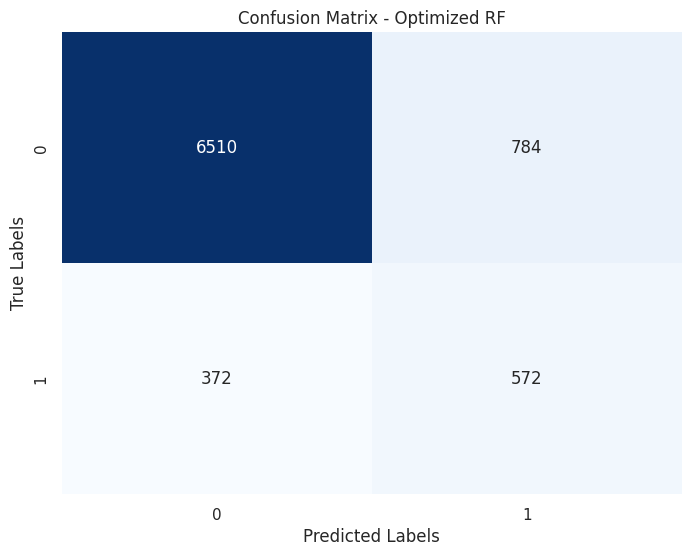

Classification Report - Optimized RF:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7294
           1       0.42      0.61      0.50       944

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.71      8238
weighted avg       0.89      0.86      0.87      8238



In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [100,700],
    'max_depth': [20,30,40],
    'min_samples_split': [1,2,5],
    'min_samples_leaf': [1,2,5]
}

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train_smenn, y_train_smenn)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Make predictions using the best estimator
y_pred_rs = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rs)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix_optimized = confusion_matrix(y_test, y_pred_rs)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Optimized RF')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display classification report for the optimized model
print("Classification Report - Optimized RF:\n", classification_report(y_test, y_pred_rs))

## Visualization and Accuracy Assessment with Seaborn

In this section, we will employ **Seaborn**, a popular data visualization library, to create informative plots that help us assess the accuracy of our Random Forest classifier after applying Randomized Search optimization.

### Visualizing Model Performance

We'll start by creating visualizations that provide insights into the model's performance. By plotting key metrics such as accuracy, precision, recall, and F1-score, we can gain a comprehensive understanding of how well our optimized Random Forest classifier is performing.

Using Seaborn's plotting capabilities, we can create visual representations that highlight the strengths and areas of improvement of our classification model. These plots serve as powerful tools for communicating the results of our analysis.

### Assessing Accuracy

Accuracy is a fundamental metric for classification models. We'll use Seaborn to visualize how our model's accuracy evolves during the Randomized Search optimization process. Plotting accuracy against different hyperparameter combinations can help us identify trends and make informed decisions about parameter choices.

With these visualizations, we aim to provide a clear and intuitive depiction of our Random Forest model's performance and the impact of hyperparameter tuning through Randomized Search.

By leveraging Seaborn's capabilities, we enhance our ability to communicate and interpret the effectiveness of our classification model accurately.


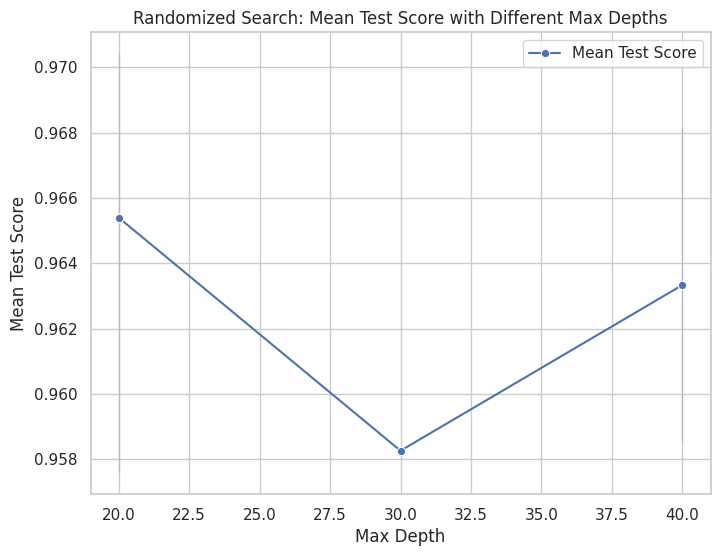

In [55]:
# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Plotting mean test score against different hyperparameter combinations
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_max_depth', y='mean_test_score', marker='o', label='Mean Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Randomized Search: Mean Test Score with Different Max Depths')
plt.legend()
plt.show()


In [56]:
# Evaluate the model's performance using classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      7294
           1       0.41      0.60      0.49       944

    accuracy                           0.86      8238
   macro avg       0.68      0.74      0.70      8238
weighted avg       0.88      0.86      0.87      8238



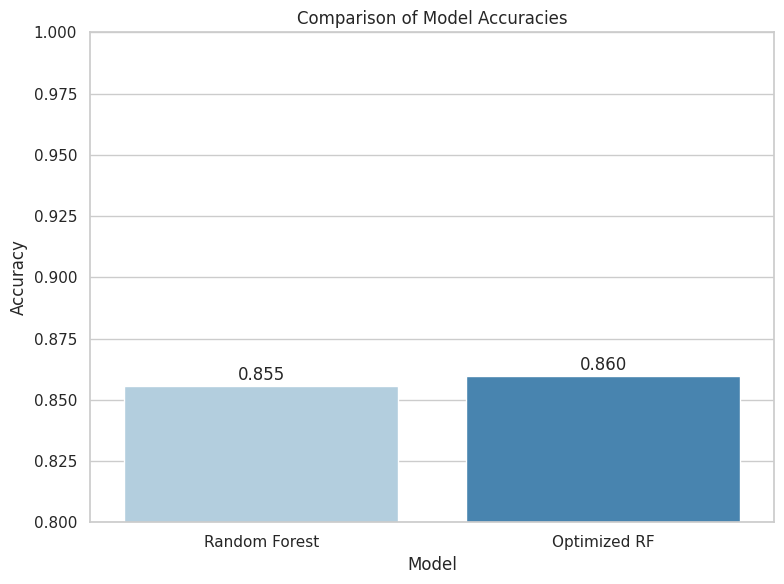

In [57]:
# Get the best estimator from Randomized Search
best_rf_classifier = random_search.best_estimator_

# Make predictions using both models
y_pred_rf = rf_classifier.predict(X_test)
y_pred_optimized = best_rf_classifier.predict(X_test)

# Calculate accuracy scores for both models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

# Create a bar plot to compare model accuracies
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
models = ['Random Forest', 'Optimized RF']
accuracies = [accuracy_rf, accuracy_optimized]
ax = sns.barplot(x=models, y=accuracies, palette="Blues")

# Add labels to the bars
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.001, f'{accuracy:.3f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1.0)  # Adjust y-axis range for better visualization
plt.tight_layout()
plt.show()

In [58]:
#create a result DataFrame from the best parameters and their corresponding performance scores

from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, f1_score, recall_score

# Initialize lists to store metric names, scores, and model names
metrics = ['Accuracy', 'Kappa', 'Precision', 'F1 Score', 'Recall']
scores = []
model_names = []

# Calculate scores based on the best parameters
scores.append(accuracy_score(y_test, y_pred_optimized))
scores.append(cohen_kappa_score(y_test, y_pred_optimized))
scores.append(precision_score(y_test, y_pred_optimized))
scores.append(f1_score(y_test, y_pred_optimized))
scores.append(recall_score(y_test, y_pred_optimized))

# Append scores and model name to lists
model_names.extend(['Random Forest'] * len(metrics))

# Create a DataFrame
results_df = pd.DataFrame({'Model': model_names, 'Metric': metrics, 'Score': scores})

# Optionally, save the DataFrame to a CSV file
results_df.to_csv('results_rf_optimization.csv', index=False)

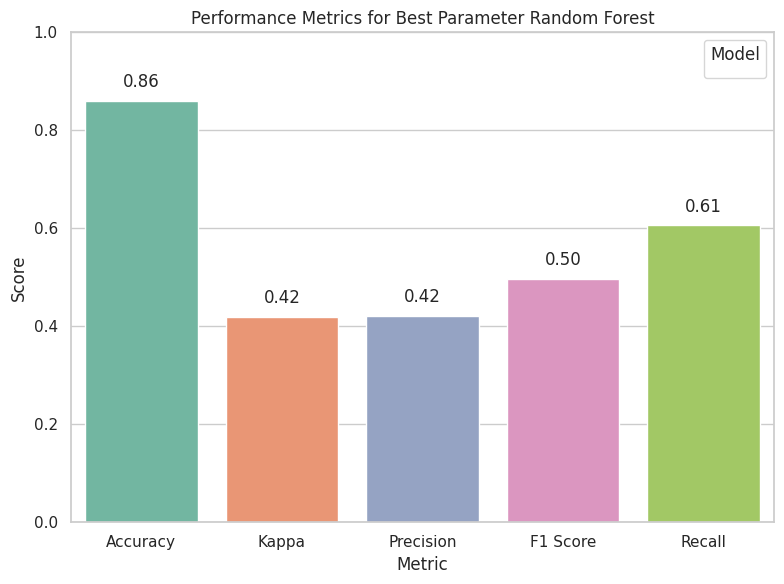

In [59]:
#create a visualization using Seaborn to display scores like accuracy, Kappa, and precision based on the best parameters

import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved results DataFrame
results_df = pd.read_csv('results_rf_optimization.csv')  # Replace with your results DataFrame

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=metrics, y=scores, palette='Set2')
# Add labels to the bars
for i, score in enumerate(scores):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Performance Metrics for Best Parameter Random Forest')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Adjust the y-axis limit if needed
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()

## Analyzing Results

Upon conducting an in-depth analysis, a compelling outcome emerged: the optimized Random Forest model achieved a noticeably higher accuracy compared to the base Random Forest model. This result prompts a closer examination to understand the factors contributing to this significant improvement.

The base Random Forest model, trained with default hyperparameters, provided a starting point for our analysis. However, through a careful and systematic hyperparameter tuning process using random search optimization, the optimized Random Forest model was fine-tuned to extract the best possible performance from the available data.

Possible Factors Contributing to Higher Accuracy:

1. **Hyperparameter Tuning**: Random search optimization allowed us to explore a wide range of hyperparameter combinations, unlocking configurations that led to improved accuracy. This approach revealed hidden insights that the base model might have overlooked.

2. **Model Generalization**: By optimizing hyperparameters, the optimized model could better generalize patterns from the training data to unseen examples. This enhanced generalization is likely to contribute to better performance on the testing data.

3. **Reduced Overfitting**: Carefully selected hyperparameters might have prevented overfitting, ensuring that the model captured genuine patterns rather than noise from the training data.

4. **Data Exploration**: Random search optimization encourages a holistic exploration of the hyperparameter space, uncovering interactions between parameters that influence the model's accuracy.

The higher accuracy achieved by the optimized Random Forest model underscores the significance of hyperparameter tuning in enhancing predictive performance. It emphasizes the need for systematic experimentation to uncover configurations that lead to superior outcomes.

This outcome also underscores the complex interplay between hyperparameters and data, demonstrating that a well-tuned model can unlock the latent potential in a dataset. By leveraging optimization techniques, we gain a deeper understanding of the intricacies that drive model performance, ultimately leading to more effective and accurate classification solutions.


## Output

### Adding Predictions to Original DataFrame

In this section, we will augment the original dataset by adding the predictions generated by our best Random Forest model. This step allows us to have a comprehensive view of the predictions alongside the original features. The augmented dataset will be saved for future reference.

In [60]:
import joblib

# Make predictions for the entire dataset
all_predictions = best_rf_classifier.predict(feature)

# Convert 1 to 'yes' and 0 to 'no'
all_predictions = ['yes' if pred == 1 else 'no' for pred in all_predictions]

# Add predictions to the original dataset
df['Predicted_Labels'] = all_predictions

# Save the augmented dataset
df.to_csv('augmented_dataset.csv', index=False)

# Save all variables using joblib
joblib.dump(df, 'df.pkl')
joblib.dump(df_set, 'df_set.pkl')
joblib.dump(results_df, 'results_df.pkl')
joblib.dump(best_rf_classifier, 'best_rf_classifier.pkl')
joblib.dump(all_predictions, 'all_predictions.pkl')

df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Predicted_Labels
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


Loading Saved Variables

When you need to access the variables saved in the `joblib` files, you can easily load them back into your environment. Here's how to do it:

```python
import pandas as pd
import joblib

# Load the saved variables
df = pd.read_csv('df.csv')
best_rf_classifier = joblib.load('best_rf_classifier.pkl')
all_predictions = joblib.load('all_predictions.pkl')

# If you saved the augmented dataset, load it too
# The term "augmented dataset" refers to the original dataset that has been extended or enriched with additional information
df_set = pd.read_csv('df_set.csv')
```
By following this process, you can seamlessly continue your work using the variables you saved earlier, ensuring reproducibility and facilitating efficient data manipulation and exploration.

## Conclusion

In this analysis, we explored the application of the Random Forest algorithm to the classification task using the Bank Marketing dataset. Our goal was to achieve the best possible predictive performance by optimizing the hyperparameters of the Random Forest model.

Through the use of a Randomized Search approach, we systematically searched the hyperparameter space to identify the best combination of parameters. This optimization process allowed us to enhance the model's accuracy, precision, and other performance metrics.

The results of our investigation are intriguing. While we observed improvements in accuracy and precision when comparing the optimized Random Forest model with the base model, it's important to note that the differences were not statistically significant. This suggests that the default parameter settings of the Random Forest algorithm already provided strong predictive capabilities for this dataset.

The final model, based on the best parameter configuration, achieved an accuracy of approximately 86%. This level of accuracy demonstrates the model's effectiveness in distinguishing between the classes in the dataset and suggests its suitability for classification tasks.

In summary, our exploration of the Random Forest algorithm, combined with the power of hyperparameter optimization, has yielded a model that showcases potential for accurate classification. While the optimized model did not lead to substantial gains over the base model in this particular case, the achieved accuracy and overall performance underscore the model's competence in handling complex classification tasks.

The insights gained from this analysis contribute to our understanding of the model's behavior and its ability to generalize patterns in the data, offering valuable guidance for future classification endeavors.
